<a href="https://colab.research.google.com/github/MayurPatil2711/SURE-IIT-Hyderabad/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pprint
from io import BytesIO
from PIL import Image
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filepath = '/content/drive/MyDrive/IITH SURE/Same Diameter Data.xlsx'

# D1 = D2 = 25 mm

In [4]:
mm_25_data = pd.read_excel(filepath, sheet_name='Diameter_25mm')
mm_25_data

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset from Centre,Exp No.,Max Radius (in pixels),Conversion Factor (in pixels/mm),Max. Radius (in mm),W',W' avg.,Collapse Type,Jet's Direction,Remarks
0,20.0,20.087,0.1250,1.0,55.0,7.6667,7.173882,2.800018,2.801461,Centre Collapse,Towards nearer solid wall with high velocity,NaN
1,NaN,19.220,NaN,2.0,52.0,7.5833,6.857173,2.802904,NaN,Centre Collapse,Towards nearer solid wall with high velocity,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,19.043,0.0625,1.0,51.0,7.5750,6.732673,2.828446,2.843198,Split After Collapse,Equal flow towards both walls,Larger volume of jet towards larger diameter c...
4,NaN,18.834,NaN,2.0,49.0,7.5750,6.468647,2.911583,NaN,Centre Collapse,Towards nearer solid wall with medium velocity,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
134,NaN,6.849,NaN,3.0,NaN,8.2250,7.416500,0.923481,NaN,Split Collapse,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,NaN,6.371,0.0625,1.0,NaN,7.9000,7.322000,0.870117,0.792324,Split Collapse,NaN,NaN
137,NaN,5.792,NaN,2.0,NaN,8.0000,7.893500,0.733768,NaN,Split Collapse,NaN,NaN


In [5]:
required_data = mm_25_data[['Gap Width Experimental (in mm)', 'Offset from Centre', "W'", 'Collapse Type']]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset from Centre']
required_data

,Gap Width Experimental (in mm),Offset from Centre,W',Collapse Type,b
0,20.087,0.1250,2.800018,Centre Collapse,2.510875
1,19.220,0.1250,2.802904,Centre Collapse,2.402500
3,19.043,0.0625,2.828446,Split After Collapse,1.190187
4,18.834,0.0625,2.911583,Centre Collapse,1.177125
5,18.717,0.0625,2.789567,Centre Collapse,1.169812
...,...,...,...,...,...
133,5.046,0.1250,0.740208,Spherical Collapse,0.630750
134,6.849,0.1250,0.923481,Split Collapse,0.856125
136,6.371,0.0625,0.870117,Split Collapse,0.398188
137,5.792,0.0625,0.733768,Split Collapse,0.362000


In [6]:
required_data['Collapse Type'].unique()

array(['Centre Collapse', 'Split After Collapse', 'Split Collapse',
       'Spherical Collapse', 'Centre Opposite Collapse',
       'Split Opposite Collapse'], dtype=object)

In [7]:
mm_25_spherical_collapse = required_data[required_data['Collapse Type'] == 'Spherical Collapse']
mm_25_centre_collapse = required_data[required_data['Collapse Type'] == 'Centre Collapse']
mm_25_split_after_collapse = required_data[required_data['Collapse Type'] == 'Split After Collapse']
mm_25_split_collapse = required_data[required_data['Collapse Type'] == 'Split Collapse']
mm_25_split_opposite_collapse = required_data[required_data['Collapse Type'] == 'Split Opposite Collapse']
mm_25_centre_opposite_collapse = required_data[required_data['Collapse Type'] == 'Centre Opposite Collapse']

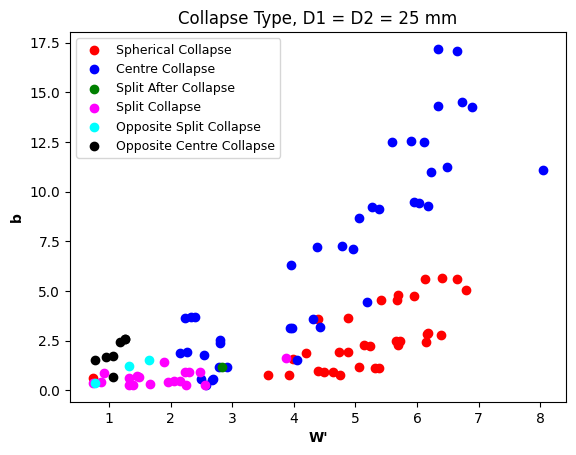

In [8]:
plt.scatter(mm_25_spherical_collapse["W'"], mm_25_spherical_collapse["b"], color = 'red')
plt.scatter(mm_25_centre_collapse["W'"], mm_25_centre_collapse["b"], color = 'blue')
plt.scatter(mm_25_split_after_collapse["W'"], mm_25_split_after_collapse["b"], color = 'green')
plt.scatter(mm_25_split_collapse["W'"], mm_25_split_collapse["b"], color = 'magenta')
plt.scatter(mm_25_split_opposite_collapse["W'"], mm_25_split_opposite_collapse["b"], color = 'cyan')
plt.scatter(mm_25_centre_opposite_collapse["W'"], mm_25_centre_opposite_collapse["b"], color = 'black')
plt.xlabel("W'", fontweight = "bold"), plt.ylabel("b", fontweight = "bold")
plt.legend(['Spherical Collapse', 'Centre Collapse', 'Split After Collapse', 'Split Collapse', 'Opposite Split Collapse', 'Opposite Centre Collapse'], fontsize = 9)
plt.title('Collapse Type, D1 = D2 = 25 mm')
plt.show()
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/D1 = D2 = 25 mm.jpg")

# D1 = D2 = 40 mm

In [9]:
mm_40_data = pd.read_excel(filepath, sheet_name='Diameter_40mm')
mm_40_data

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset ratio,Exp No.,Conversion Factor (in pixels/mm),Max Radius (in pixels),Max Radius (in mm),W',W'_Avg,Collapse Type,Jet Direction,Remarks
0,45.0,43.28000,0.2500,1.0,NaN,NaN,6.8110,6.354427,6.185567,Centre Collapse,Towards Solid Wall with High Velocity,NaN
1,NaN,43.08600,NaN,2.0,NaN,NaN,7.2800,5.918407,NaN,Centre Collapse,Towards Solid Wall with High Velocity,NaN
2,NaN,45.69000,NaN,3.0,NaN,NaN,7.2710,6.283867,NaN,Centre Collapse,Towards Solid Wall with High Velocity,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,47.23100,0.1250,1.0,NaN,NaN,7.4740,6.319374,6.751023,Centre Collapse,No flow towards Solid Wall,Significant amount of small bubble like struct...
...,...,...,...,...,...,...,...,...,...,...,...,...
141,NaN,4.60100,NaN,2.0,7.8250,NaN,9.3040,0.494518,NaN,Split Collapse,NaN,NaN
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,NaN,4.53100,0.0625,1.0,7.7250,NaN,8.1895,0.553269,0.501218,NaN,NaN,NaN
144,NaN,4.36200,NaN,2.0,7.9667,NaN,9.5950,0.454612,NaN,NaN,NaN,NaN


In [10]:
required_data = mm_40_data[['Gap Width Experimental (in mm)', 'Offset ratio', "W'", 'Collapse Type']]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset ratio']
required_data

,Gap Width Experimental (in mm),Offset ratio,W',Collapse Type,b
0,43.28000,0.2500,6.354427,Centre Collapse,10.820000
1,43.08600,0.2500,5.918407,Centre Collapse,10.771500
2,45.69000,0.2500,6.283867,Centre Collapse,11.422500
4,47.23100,0.1250,6.319374,Centre Collapse,5.903875
5,46.10800,0.1250,6.779591,Spherical Collapse,5.763500
...,...,...,...,...,...
140,5.02200,0.1250,0.569033,Split Collapse,0.627750
141,4.60100,0.1250,0.494518,Split Collapse,0.575125
143,4.53100,0.0625,0.553269,Split Collapse,0.283187
144,4.36200,0.0625,0.454612,Split Collapse,0.272625


In [11]:
required_data['Collapse Type'].unique()

array(['Centre Collapse', 'Spherical Collapse', 'Split After Collapse',
       'Split Collapse', 'Centre Opposite Collapse',
       'Split Opposite Collapse'], dtype=object)

In [12]:
mm_40_spherical_collapse = required_data[required_data['Collapse Type'] == 'Spherical Collapse']
mm_40_centre_collapse = required_data[required_data['Collapse Type'] == 'Centre Collapse']
mm_40_split_after_collapse = required_data[required_data['Collapse Type'] == 'Split After Collapse']
mm_40_split_collapse = required_data[required_data['Collapse Type'] == 'Split Collapse']
mm_40_centre_opposite_collapse = required_data[required_data['Collapse Type'] == 'Centre Opposite Collapse']
mm_40_split_opposite_collapse = required_data[required_data['Collapse Type'] == 'Split Opposite Collapse']

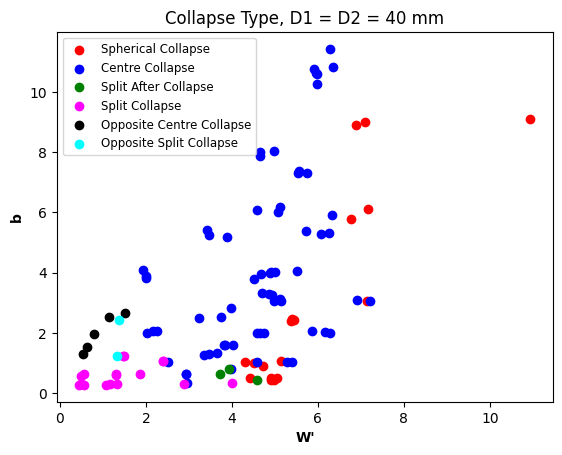

In [13]:
plt.scatter(mm_40_spherical_collapse["W'"], mm_40_spherical_collapse["b"], color = 'red')
plt.scatter(mm_40_centre_collapse["W'"], mm_40_centre_collapse["b"], color = 'blue')
plt.scatter(mm_40_split_after_collapse["W'"], mm_40_split_after_collapse["b"], color = 'green')
plt.scatter(mm_40_split_collapse["W'"], mm_40_split_collapse["b"], color = 'magenta')
plt.scatter(mm_40_centre_opposite_collapse["W'"], mm_40_centre_opposite_collapse["b"], color = "black")
plt.scatter(mm_40_split_opposite_collapse["W'"], mm_40_split_opposite_collapse["b"], color = "cyan")
plt.xlabel("W'", fontweight = "bold"), plt.ylabel("b", fontweight = "bold")
plt.legend(['Spherical Collapse', 'Centre Collapse', 'Split After Collapse', 'Split Collapse', 'Opposite Centre Collapse', 'Opposite Split Collapse'], fontsize = 8.5)
plt.title('Collapse Type, D1 = D2 = 40 mm')
plt.show()
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/D1 = D2 = 40 mm.jpg")

# D1 = D2 = 50 mm

In [15]:
mm_50_data = pd.read_excel(filepath, sheet_name='Diameter_50mm')
mm_50_data

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset from Centre,Exp No.,Max Radius (in pixels),Conversion Factor (in pixels/mm),Max. Radius (in mm),W',W' Avg.,Collapse Type,Jet_Direction,Remarks
0,25.0,24.514,0.06250,1.0,57.0,8.3014,6.866312,3.570185,3.518056,Split After Collapse,Towards nearer wall with low velocity,"Dumpbell-like shape, larger volume towards nea..."
1,NaN,24.828,NaN,2.0,59.0,8.2167,7.180498,3.457699,NaN,Split After Collapse,Towards nearer wall with low velocity,"Dumpbell-like shape, larger volume towards nea..."
2,NaN,24.562,NaN,3.0,57.0,8.1833,6.965405,3.526284,NaN,Split After Collapse,Towards nearer wall with low velocity,"Dumpbell-like shape, larger volume towards nea..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,26.574,0.03125,1.0,52.0,7.6015,6.840755,3.884659,3.645259,Centre Collapse,Towards nearer solid wall with low velocity,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
136,NaN,5.763,NaN,3.0,69.0,7.6345,9.037920,0.637647,NaN,Centre Opposite Collapse,NaN,NaN
137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,5.525,0.06250,1.0,68.0,7.7833,8.736654,0.632393,0.563335,Centre Opposite Collapse,NaN,NaN
139,NaN,4.984,NaN,2.0,71.0,7.6250,9.311475,0.535254,NaN,Centre Opposite Collapse,NaN,NaN


In [16]:
required_data = mm_50_data[['Gap Width Experimental (in mm)', 'Offset from Centre', "W'", 'Collapse Type']]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset from Centre']
required_data

,Gap Width Experimental (in mm),Offset from Centre,W',Collapse Type,b
0,24.514,0.06250,3.570185,Split After Collapse,1.532125
1,24.828,0.06250,3.457699,Split After Collapse,1.551750
2,24.562,0.06250,3.526284,Split After Collapse,1.535125
4,26.574,0.03125,3.884659,Centre Collapse,0.830438
5,24.106,0.03125,3.568633,Center Collapse,0.753313
...,...,...,...,...,...
135,5.604,0.12500,0.638045,Centre Opposite Collapse,0.700500
136,5.763,0.12500,0.637647,Centre Opposite Collapse,0.720375
138,5.525,0.06250,0.632393,Centre Opposite Collapse,0.345313
139,4.984,0.06250,0.535254,Centre Opposite Collapse,0.311500


In [17]:
required_data['Collapse Type'].unique()

array(['Split After Collapse', 'Centre Collapse', 'Center Collapse',
       'Split Collapse', 'Spherical Collapse', 'Split Opposite Collapse',
       'Centre Opposite Collapse'], dtype=object)

In [18]:
mm_50_spherical_collapse = required_data[required_data['Collapse Type'] == 'Spherical Collapse']
mm_50_centre_collapse = required_data[required_data['Collapse Type'] == 'Centre Collapse']
mm_50_split_after_collapse = required_data[required_data['Collapse Type'] == 'Split After Collapse']
mm_50_split_collapse = required_data[required_data['Collapse Type'] == 'Split Collapse']
mm_50_split_opposite_collapse = required_data[required_data['Collapse Type'] == 'Split Opposite Collapse']
mm_50_centre_opposite_collapse = required_data[required_data['Collapse Type'] == 'Centre Opposite Collapse']

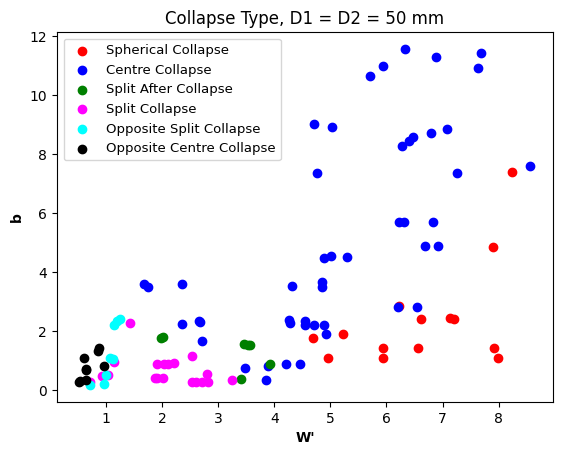

In [19]:
plt.scatter(mm_50_spherical_collapse["W'"], mm_50_spherical_collapse["b"], color = 'red')
plt.scatter(mm_50_centre_collapse["W'"], mm_50_centre_collapse["b"], color = 'blue')
plt.scatter(mm_50_split_after_collapse["W'"], mm_50_split_after_collapse["b"], color = 'green')
plt.scatter(mm_50_split_collapse["W'"], mm_50_split_collapse["b"], color = 'magenta')
plt.scatter(mm_50_split_opposite_collapse["W'"], mm_50_split_opposite_collapse["b"], color = 'cyan')
plt.scatter(mm_50_centre_opposite_collapse["W'"], mm_50_centre_opposite_collapse["b"], color = 'black')
plt.xlabel("W'", fontweight = "bold"), plt.ylabel("b", fontweight = "bold")
plt.legend(['Spherical Collapse', 'Centre Collapse', 'Split After Collapse', 'Split Collapse', "Opposite Split Collapse", "Opposite Centre Collapse"], fontsize = 9.5)
plt.title('Collapse Type, D1 = D2 = 50 mm')
plt.show()
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/D1 = D2 = 50 mm.jpg")

# All Plots of Same Diameter

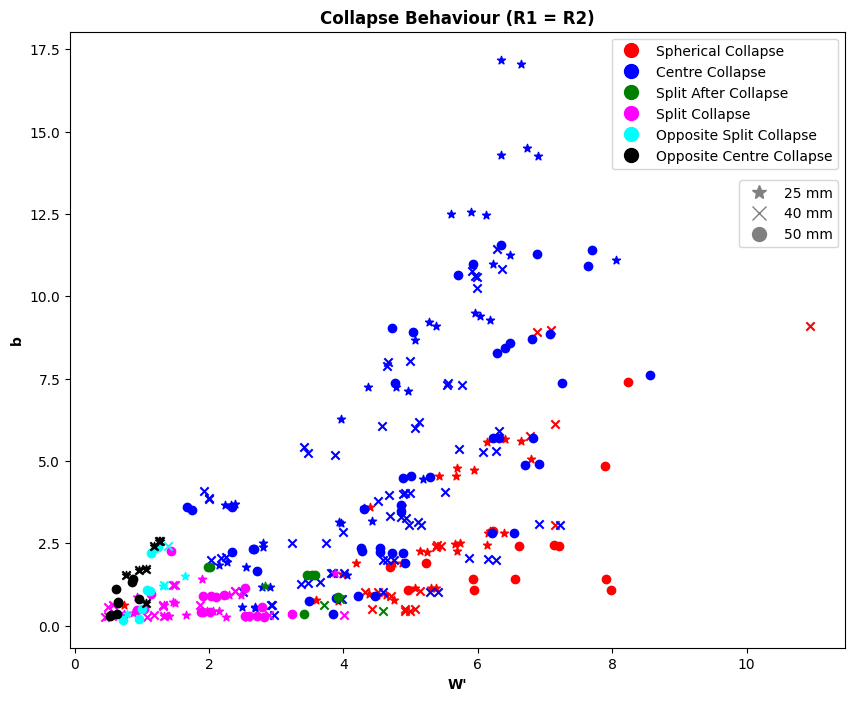

In [20]:
plt.figure(figsize=(10, 8))

#Spherical Collapse
plt.scatter(mm_25_spherical_collapse["W'"], mm_25_spherical_collapse["b"], color = 'red', marker = '*')
plt.scatter(mm_40_spherical_collapse["W'"], mm_40_spherical_collapse["b"], color = 'red', marker = 'x')
plt.scatter(mm_50_spherical_collapse["W'"], mm_50_spherical_collapse["b"], color = 'red')

#Centre Collapse
plt.scatter(mm_25_centre_collapse["W'"], mm_25_centre_collapse["b"], color = 'blue', marker = '*')
plt.scatter(mm_40_centre_collapse["W'"], mm_40_centre_collapse["b"], color = 'blue', marker = 'x')
plt.scatter(mm_50_centre_collapse["W'"], mm_50_centre_collapse["b"], color = 'blue')

#Split After Collapse
plt.scatter(mm_25_split_after_collapse["W'"], mm_25_split_after_collapse["b"], color = 'green', marker = '*')
plt.scatter(mm_40_split_after_collapse["W'"], mm_40_split_after_collapse["b"], color = 'green', marker = 'x')
plt.scatter(mm_50_split_after_collapse["W'"], mm_50_split_after_collapse["b"], color = 'green')

#Split Collapse
plt.scatter(mm_25_split_collapse["W'"], mm_25_split_collapse["b"], color = 'magenta', marker = '*')
plt.scatter(mm_40_split_collapse["W'"], mm_40_split_collapse["b"], color = 'magenta', marker = 'x')
plt.scatter(mm_50_split_collapse["W'"], mm_50_split_collapse["b"], color = 'magenta')

#Split Opposite Collapse
plt.scatter(mm_25_split_opposite_collapse["W'"], mm_25_split_opposite_collapse["b"], color = 'cyan', marker = '*')
plt.scatter(mm_40_split_opposite_collapse["W'"], mm_40_split_opposite_collapse["b"], color = "cyan", marker = 'x')
plt.scatter(mm_50_split_opposite_collapse["W'"], mm_50_split_opposite_collapse["b"], color = 'cyan')

#Centre Opposite Collapse
plt.scatter(mm_25_centre_opposite_collapse["W'"], mm_25_centre_opposite_collapse["b"], color = 'black', marker = '*')
plt.scatter(mm_25_centre_opposite_collapse["W'"], mm_25_centre_opposite_collapse["b"], color = 'black', marker = 'x')
plt.scatter(mm_50_centre_opposite_collapse["W'"], mm_50_centre_opposite_collapse["b"], color = 'black')


# Create custom legend handles for colors
import matplotlib.lines as mlines

red_dot = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Spherical Collapse')
blue_dot = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Centre Collapse')
green_dot = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=10, label='Split After Collapse')
magenta_dot = mlines.Line2D([], [], color='magenta', marker='o', linestyle='None', markersize=10, label='Split Collapse')
cyan_dot = mlines.Line2D([], [], color='cyan', marker='o', linestyle='None', markersize=10, label='Opposite Split Collapse')
black_dot = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=10, label='Opposite Centre Collapse')

# Create custom legend handles for markers
star_marker = mlines.Line2D([], [], color='gray', marker='*', linestyle='None', markersize=10, label="25 mm")
x_marker = mlines.Line2D([], [], color='gray', marker='x', linestyle='None', markersize=10, label="40 mm")
circle_marker = mlines.Line2D([], [], color='gray', marker='o', linestyle='None', markersize=10, label="50 mm")

# Add legends to the plot
first_legend = plt.legend(handles=[red_dot, blue_dot, green_dot, magenta_dot, cyan_dot, black_dot], bbox_to_anchor=(1, 1))
plt.legend(handles=[star_marker, x_marker, circle_marker], bbox_to_anchor=(1, 0.77))

# Add the first legend back to the plot (to not overwrite it)
plt.gca().add_artist(first_legend)


plt.xlabel("W'", fontweight = 'bold'), plt.ylabel("b", fontweight = "bold")
plt.title("Collapse Behaviour (R1 = R2)", fontweight = 'bold')
plt.show()

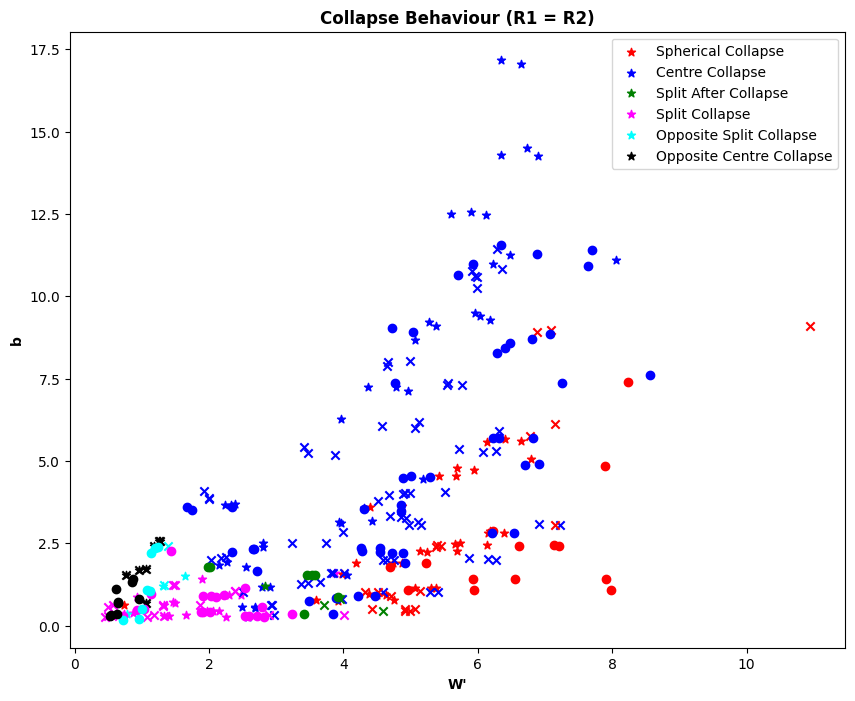

In [22]:
plt.figure(figsize=(10, 8))

plt.scatter(mm_25_spherical_collapse["W'"], mm_25_spherical_collapse["b"], color = 'red', marker = '*')
plt.scatter(mm_25_centre_collapse["W'"], mm_25_centre_collapse["b"], color = 'blue', marker = '*')
plt.scatter(mm_25_split_after_collapse["W'"], mm_25_split_after_collapse["b"], color = 'green', marker = '*')
plt.scatter(mm_25_split_collapse["W'"], mm_25_split_collapse["b"], color = 'magenta', marker = '*')
plt.scatter(mm_25_split_opposite_collapse["W'"], mm_25_split_opposite_collapse["b"], color = 'cyan', marker = '*')
plt.scatter(mm_25_centre_opposite_collapse["W'"], mm_25_centre_opposite_collapse["b"], color = 'black', marker = '*')

plt.scatter(mm_40_centre_collapse["W'"], mm_40_centre_collapse["b"], color = 'blue', marker = 'x')
plt.scatter(mm_40_spherical_collapse["W'"], mm_40_spherical_collapse["b"], color = 'red', marker = 'x')
plt.scatter(mm_40_split_after_collapse["W'"], mm_40_split_after_collapse["b"], color = 'green', marker = 'x')
plt.scatter(mm_40_split_collapse["W'"], mm_40_split_collapse["b"], color = 'magenta', marker = 'x')
plt.scatter(mm_40_split_opposite_collapse["W'"], mm_40_split_opposite_collapse["b"], color = "cyan", marker = 'x')
plt.scatter(mm_25_centre_opposite_collapse["W'"], mm_25_centre_opposite_collapse["b"], color = 'black', marker = 'x')

plt.scatter(mm_50_spherical_collapse["W'"], mm_50_spherical_collapse["b"], color = 'red')
plt.scatter(mm_50_centre_collapse["W'"], mm_50_centre_collapse["b"], color = 'blue')
plt.scatter(mm_50_split_after_collapse["W'"], mm_50_split_after_collapse["b"], color = 'green')
plt.scatter(mm_50_split_collapse["W'"], mm_50_split_collapse["b"], color = 'magenta')
plt.scatter(mm_50_split_opposite_collapse["W'"], mm_50_split_opposite_collapse["b"], color = 'cyan')
plt.scatter(mm_50_centre_opposite_collapse["W'"], mm_50_centre_opposite_collapse["b"], color = 'black')

plt.xlabel("W'", fontweight = 'bold'), plt.ylabel("b", fontweight = "bold")
plt.legend(["Spherical Collapse", "Centre Collapse", "Split After Collapse", "Split Collapse", "Opposite Split Collapse", "Opposite Centre Collapse"])
plt.title("Collapse Behaviour (R1 = R2)", fontweight = 'bold')
plt.show()